## Project: Urinary biomarkers for pancreatic cancer

The original dataset is available from https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer

Pancreatic cancer is an extremely deadly type of cancer. Once diagnosed, the five-year survival rate is less than 10%. However, if pancreatic cancer is caught early, the odds of surviving are much better. Unfortunately, many cases of pancreatic cancer show no symptoms until the cancer has spread throughout the body. A diagnostic test to identify people with pancreatic cancer could be enormously helpful.

The goal is utlizing this dataset to predict diagnosis, and more specifically, to differentiate between 3 (pancreatic cancer) versus 2 (non-cancerous pancreas condition) and 1 (healthy). 

### In this notebook, we will focus on Data Wrangling.

In [1]:
# Import Pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the dataset from a csv file
ub_data =  pd.read_csv("./archive/Debernardi et al 2020 data.csv")
print(ub_data.head())

# Add the supplemental documentation from a csv file for future reference
ub_doc = pd.read_csv("./archive/Debernardi et al 2020 documentation.csv")
print(ub_doc)

  sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0        S1        Cohort1          BPTB   33   F          1   NaN   
1       S10        Cohort1          BPTB   81   F          1   NaN   
2      S100        Cohort2          BPTB   51   M          1   NaN   
3      S101        Cohort2          BPTB   61   M          1   NaN   
4      S102        Cohort2          BPTB   62   M          1   NaN   

  benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                     NaN           11.7     1.83222  0.893219   52.94884   
1                     NaN            NaN     0.97266  2.037585   94.46703   
2                     NaN            7.0     0.78039  0.145589  102.36600   
3                     NaN            8.0     0.70122  0.002805   60.57900   
4                     NaN            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142.95000

In [2]:
#Call the info method on ub_data to see a summary of the data
ub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [3]:
#Count the number of missing values by columnb
missing = pd.concat([ub_data.isnull().sum(), 100 * ub_data.isnull().mean()], axis = 1, keys=["count","%"])
missing.sort_values(by="count", ascending=False)

count          %
stage                      391  66.271186
benign_sample_diagnosis    382  64.745763
REG1A                      284  48.135593
plasma_CA19_9              240  40.677966
sample_id                    0   0.000000
patient_cohort               0   0.000000
sample_origin                0   0.000000
age                          0   0.000000
sex                          0   0.000000
diagnosis                    0   0.000000
creatinine                   0   0.000000
LYVE1                        0   0.000000
REG1B                        0   0.000000
TFF1                         0   0.000000

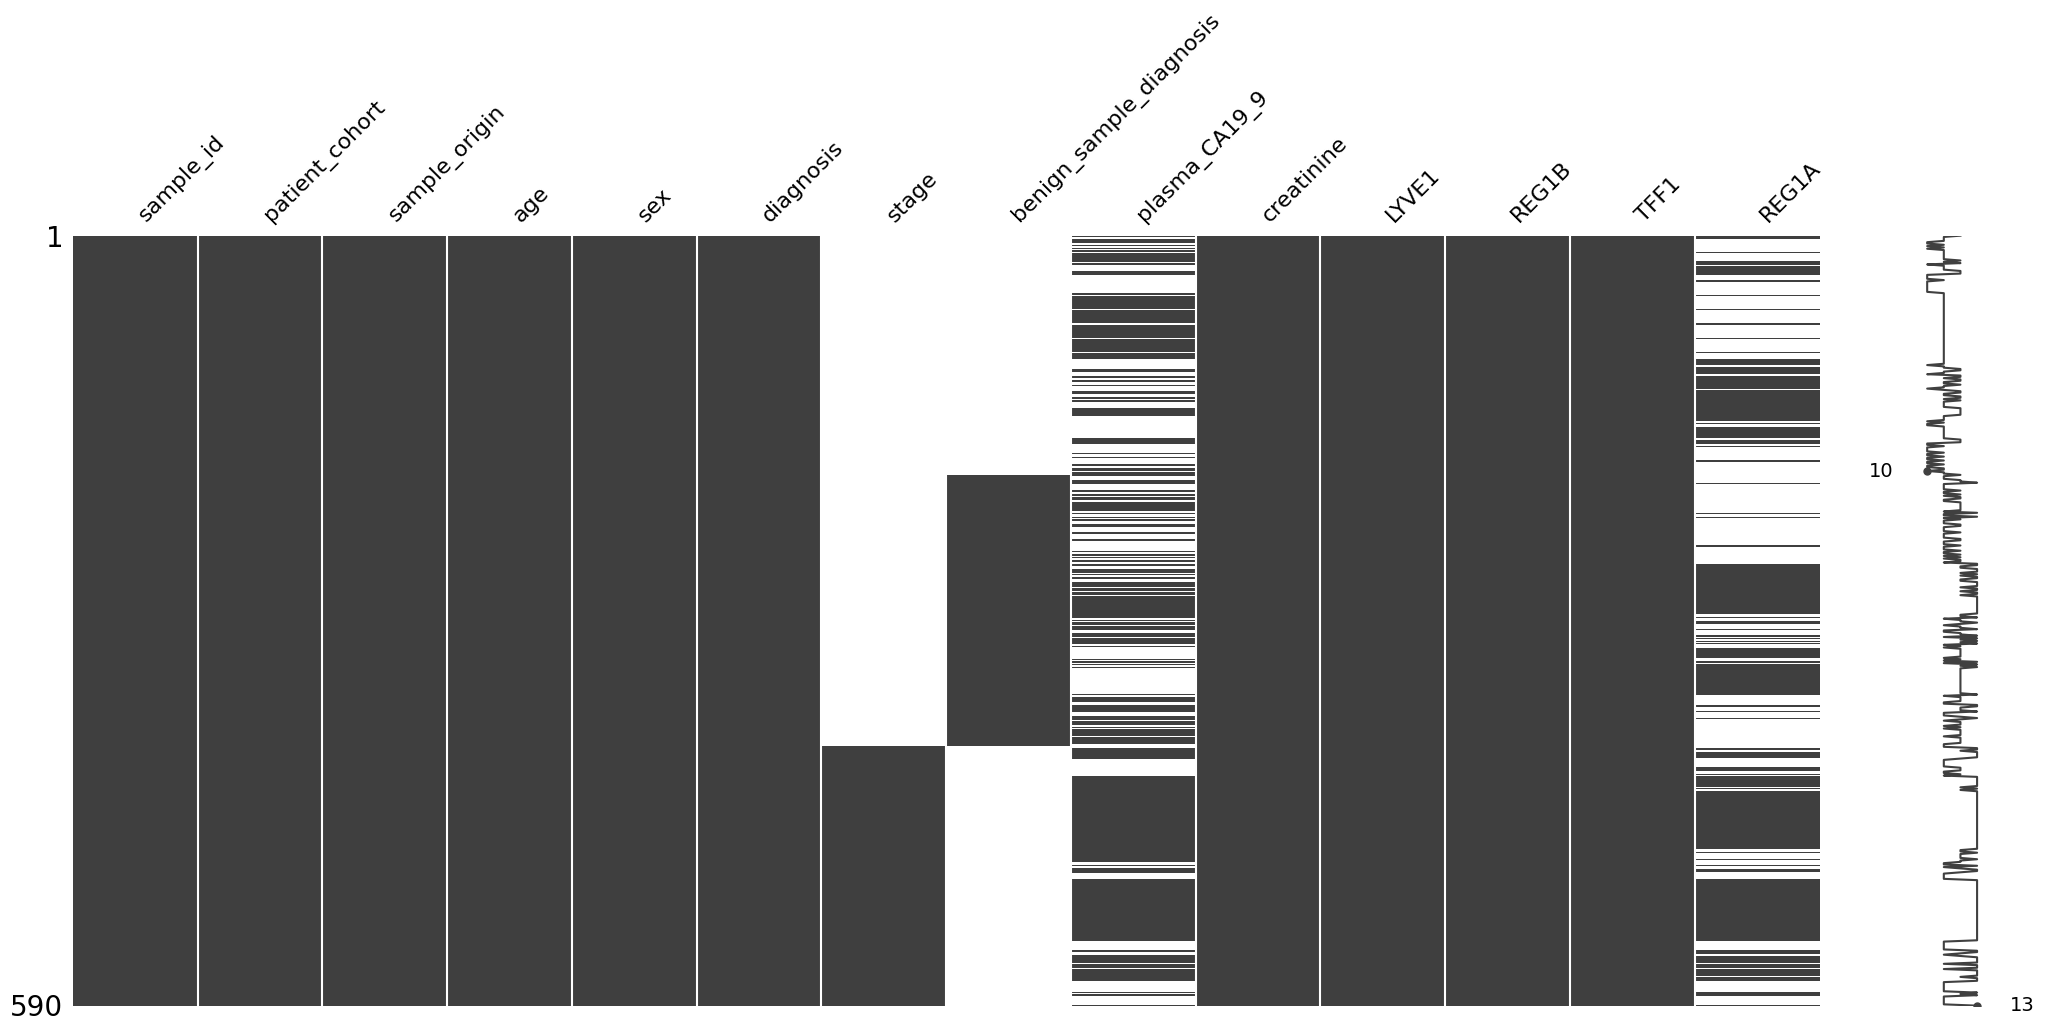

In [4]:
# Visualize missingness matrix
# %matplotlib inline sets the backend of matplotlib to the 'inline' backend: With this backend, 
# the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
%matplotlib inline
import missingno as msno
msno.matrix(ub_data)
plt.show()

    sample_id patient_cohort sample_origin sex stage benign_sample_diagnosis
0          S1        Cohort1          BPTB   F   NaN                     NaN
1         S10        Cohort1          BPTB   F   NaN                     NaN
2        S100        Cohort2          BPTB   M   NaN                     NaN
3        S101        Cohort2          BPTB   M   NaN                     NaN
4        S102        Cohort2          BPTB   M   NaN                     NaN
..        ...            ...           ...  ..   ...                     ...
585      S549        Cohort2          BPTB   M    IV                     NaN
586      S558        Cohort2          BPTB   F    IV                     NaN
587      S560        Cohort2          BPTB   M    IV                     NaN
588      S583        Cohort2          BPTB   F    IV                     NaN
589      S590        Cohort1          BPTB   M    IV                     NaN

[590 rows x 6 columns]


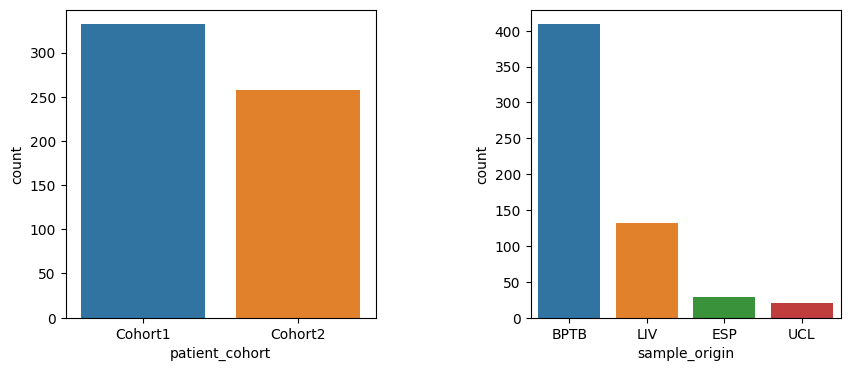

In [5]:
# Look into categorical features 
ub_data_cat = ub_data.select_dtypes(include = ["object"])
print(ub_data_cat)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.countplot(x="patient_cohort", data=ub_data_cat, ax=ax[0])
sns.countplot(x="sample_origin", data=ub_data_cat, ax=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.show()

In [6]:
# Find the number of patients in each diagnosis catetory
# According to the documentation, diagnosis: 3 (pancreatic cancer), 2 (non-cancerous pancreas condition) and 1 (healthy).
ub_data['diagnosis'].value_counts()

2    208
3    199
1    183
Name: diagnosis, dtype: int64

In [7]:
#Find the details in patients with non-cancerous pancreas condition (diagnosis 2)
ub_data[ub_data['diagnosis']==2]["benign_sample_diagnosis"].value_counts()

Pancreatitis                                                    41
Pancreatitis (Chronic)                                          35
Gallstones                                                      21
Pancreatitis (Alcohol-Chronic)                                  11
Cholecystitis                                                    9
Serous cystadenoma - NOS                                         7
Choledocholiathiasis                                             6
Abdominal Pain                                                   6
Pancreatitis (Idiopathic)                                        4
Pancreatitis (Alcohol-Chronic-Pseuodcyst)                        4
Pancreatitis (Gallstone)                                         4
Pancreatitis (Pseudocyst)                                        4
Premalignant lesions-Mucinous cystadenoma-NOS                    3
Pancreatitis (Autoimmune)                                        3
Serous microcystic adenoma                                    

In [8]:
#Find the details in patients with pancreatic cancer (diagnosis 3)
ub_data[ub_data['diagnosis']==3]["stage"].value_counts()

III    76
IIB    68
IV     21
IB     12
IIA    11
II      7
IA      3
I       1
Name: stage, dtype: int64

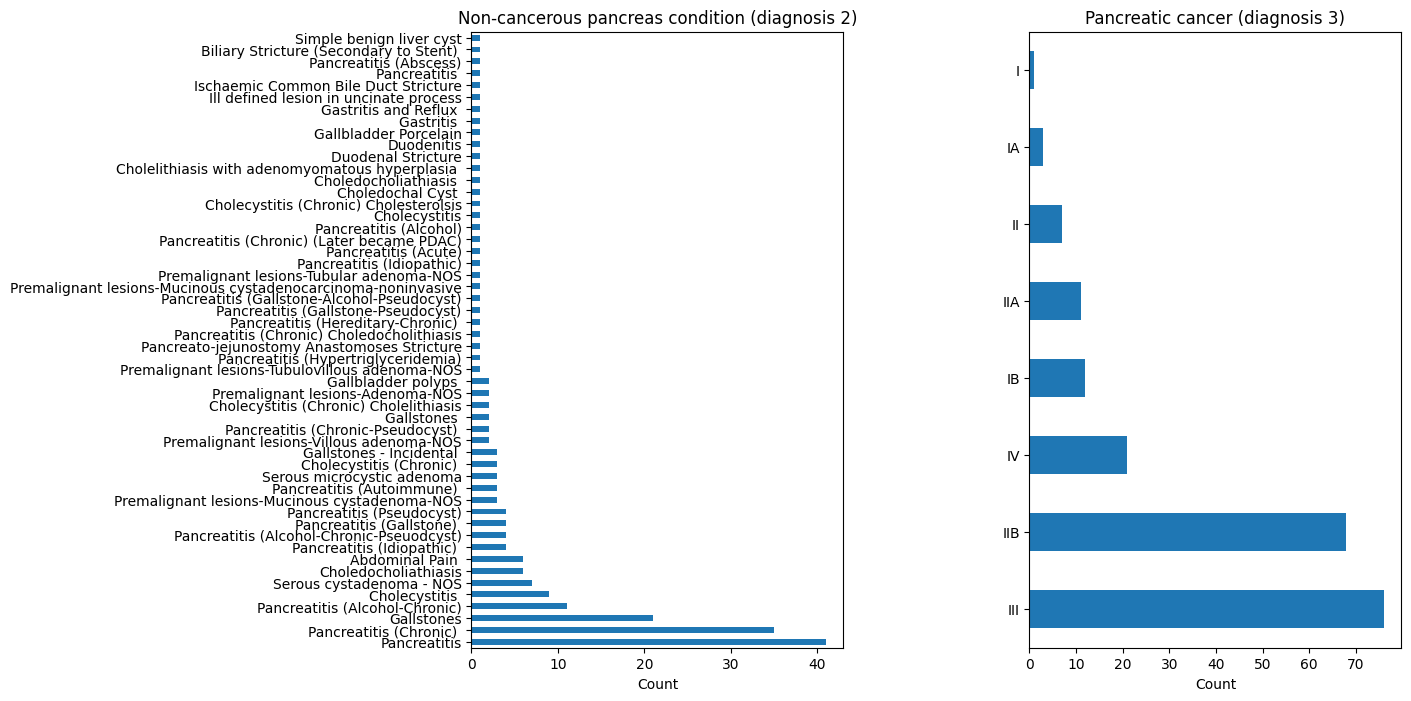

In [9]:
#Plot the distribution of patients in each diagnosis catetory 
#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ub_data[ub_data['diagnosis']==2]["benign_sample_diagnosis"].value_counts().plot(kind="barh", ax=ax[0])
#Give the plot a helpful title of 'Non-cancerous pancreas condition (diagnosis 2)'
ax[0].set_title("Non-cancerous pancreas condition (diagnosis 2)")
#Label the xaxis 'Count'
ax[0].set_xlabel("Count")
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
ub_data[ub_data['diagnosis']==3]["stage"].value_counts().plot(kind="barh", ax=ax[1])
#Give the plot a helpful title of 'Pancreatic cancer (diagnosis 3)'
ax[1].set_title("Pancreatic cancer (diagnosis 3)")
#Label the xaxis 'Count'
ax[1].set_xlabel("Count")
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5)

In [10]:
#Convert Categorical Variable (sex) to Numeric
ub_data['sex'].replace(['M','F'],[1, 0], inplace=True)
print(ub_data.head())

  sample_id patient_cohort sample_origin  age  sex  diagnosis stage  \
0        S1        Cohort1          BPTB   33    0          1   NaN   
1       S10        Cohort1          BPTB   81    0          1   NaN   
2      S100        Cohort2          BPTB   51    1          1   NaN   
3      S101        Cohort2          BPTB   61    1          1   NaN   
4      S102        Cohort2          BPTB   62    1          1   NaN   

  benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                     NaN           11.7     1.83222  0.893219   52.94884   
1                     NaN            NaN     0.97266  2.037585   94.46703   
2                     NaN            7.0     0.78039  0.145589  102.36600   
3                     NaN            8.0     0.70122  0.002805   60.57900   
4                     NaN            9.0     0.21489  0.000860   65.54000   

         TFF1     REG1A  
0  654.282174  1262.000  
1  209.488250   228.407  
2  461.141000       NaN  
3  142

In [11]:
# Convert Categorical Variable (stage) to Numeric
# Here we combine I and IA, II and IIA, which might not be the best approach...
ub_data["stage"].replace(["I", "IA", "IB", "II", "IIA", "IIB", "III", "IV"], [1,1,2,3,3,4,5,6], inplace=True)
print(ub_data.tail())

    sample_id patient_cohort sample_origin  age  sex  diagnosis  stage  \
585      S549        Cohort2          BPTB   68    1          3    6.0   
586      S558        Cohort2          BPTB   71    0          3    6.0   
587      S560        Cohort2          BPTB   63    1          3    6.0   
588      S583        Cohort2          BPTB   75    0          3    6.0   
589      S590        Cohort1          BPTB   74    1          3    6.0   

    benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1       REG1B  \
585                     NaN            NaN     0.52026  7.058209  156.241000   
586                     NaN            NaN     0.85956  8.341207   16.915000   
587                     NaN            NaN     1.36851  7.674707  289.701000   
588                     NaN            NaN     1.33458  8.206777  205.930000   
589                     NaN         1488.0     1.50423  8.200958  411.938275   

            TFF1    REG1A  
585   525.178000      NaN  
586   245.947000  

In [12]:
# Explore numeric data summary, pay attention to the columns with min == 0 and look into those columns.
ub_data.describe()

age         sex   diagnosis       stage  plasma_CA19_9  \
count  590.000000  590.000000  590.000000  199.000000     350.000000   
mean    59.079661    0.493220    2.027119    4.321608     654.002944   
std     13.109520    0.500378    0.804873    1.104209    2430.317642   
min     26.000000    0.000000    1.000000    1.000000       0.000000   
25%     50.000000    0.000000    1.000000    4.000000       8.000000   
50%     60.000000    0.000000    2.000000    4.000000      26.500000   
75%     69.000000    1.000000    3.000000    5.000000     294.000000   
max     89.000000    1.000000    3.000000    6.000000   31000.000000   

       creatinine       LYVE1        REG1B          TFF1         REG1A  
count  590.000000  590.000000   590.000000    590.000000    306.000000  
mean     0.855383    3.063530   111.774090    597.868722    735.281222  
std      0.639028    3.438796   196.267110   1010.477245   1477.247724  
min      0.056550    0.000129     0.001104      0.005293      0.000000  
25%      0.373230    0.167179    10.757216     43.961000     80.692000  
50%      0.723840    1.649862    34.303353    259.873974    208.538500  
75%      1.139482    5.205037   122.741013    742.736000    649.000000  
max      4.116840   23.890323  1403.897600  13344.300000  13200.000000

In [13]:
# Look into the plasma_CA19_9 column
# The dection sensitivity of plasma CA19-9 is 0.3 - 200 U/ml. 0 U/ml was most likey replaced with NaN.

ub_data[ub_data["plasma_CA19_9"]==0]

sample_id patient_cohort sample_origin  age  sex  diagnosis  stage  \
77      S169        Cohort2          BPTB   50    0          1    NaN   

   benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1     REG1B  \
77                     NaN            0.0     0.53157  0.005046  5.381445   

        TFF1  REG1A  
77  5.046098    NaN

Fortunately, we only have one healthy patient (diagnosis 1) with 0 U/ml plasma CA19-9.

In [14]:
# Look into the REG1A column
# The dection limit of REG1A is 0.094 ng/mL. 0 ng/mL was most likey replaced with NaN.

ub_data[ub_data["REG1A"]==0]

sample_id patient_cohort sample_origin  age  sex  diagnosis  stage  \
102       S26        Cohort1          BPTB   51    1          1    NaN   
108       S31        Cohort1          BPTB   49    1          1    NaN   
111       S34        Cohort1          BPTB   46    1          1    NaN   
156       S75        Cohort1          BPTB   28    0          1    NaN   
301      S252        Cohort1          BPTB   48    1          2    NaN   
306      S281        Cohort1          BPTB   62    1          2    NaN   
553      S533        Cohort1          BPTB   68    1          3    5.0   

            benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1  \
102                             NaN           6.94     0.19227  0.571181   
108                             NaN           7.86     0.32799  0.011929   
111                             NaN           6.58     0.35061  0.001402   
156                             NaN          84.30     0.32799  0.001312   
301  Pancreatitis (Alcohol-Chronic)          46.10     0.76908  0.260904   
306  Pancreatitis (Alcohol-Chronic)          30.00     0.09048  0.000362   
553                             NaN         422.00     0.28275  1.706775   

        REG1B       TFF1  REG1A  
102  3.099211  39.729131    0.0  
108  6.008635   5.637440    0.0  
111  2.191019  33.193840    0.0  
156  7.520023  19.210785    0.0  
301  4.644778  69.315200    0.0  
306  3.130000   6.261730    0.0  
553  2.632109  25.096922    0.0

There are totally 7 samples with 0 ng/mL REG1A. The three patients (diagnosis 2 & 3) are which make us concerning and might confound the analysis. We may have to consider replacing those patients with 0 ng/mL REG1A with NaN first, and impute these missing values with median later.

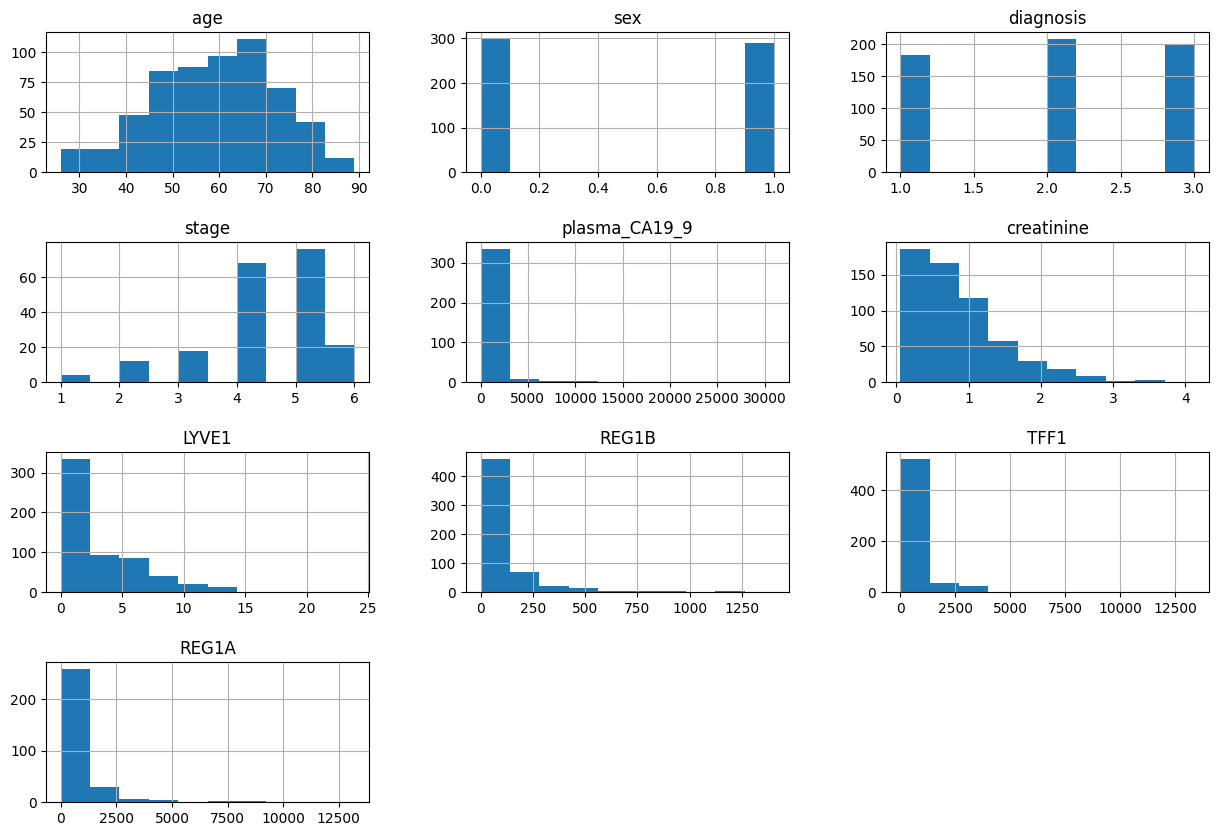

In [15]:
# Look into distributions of feature values
ub_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

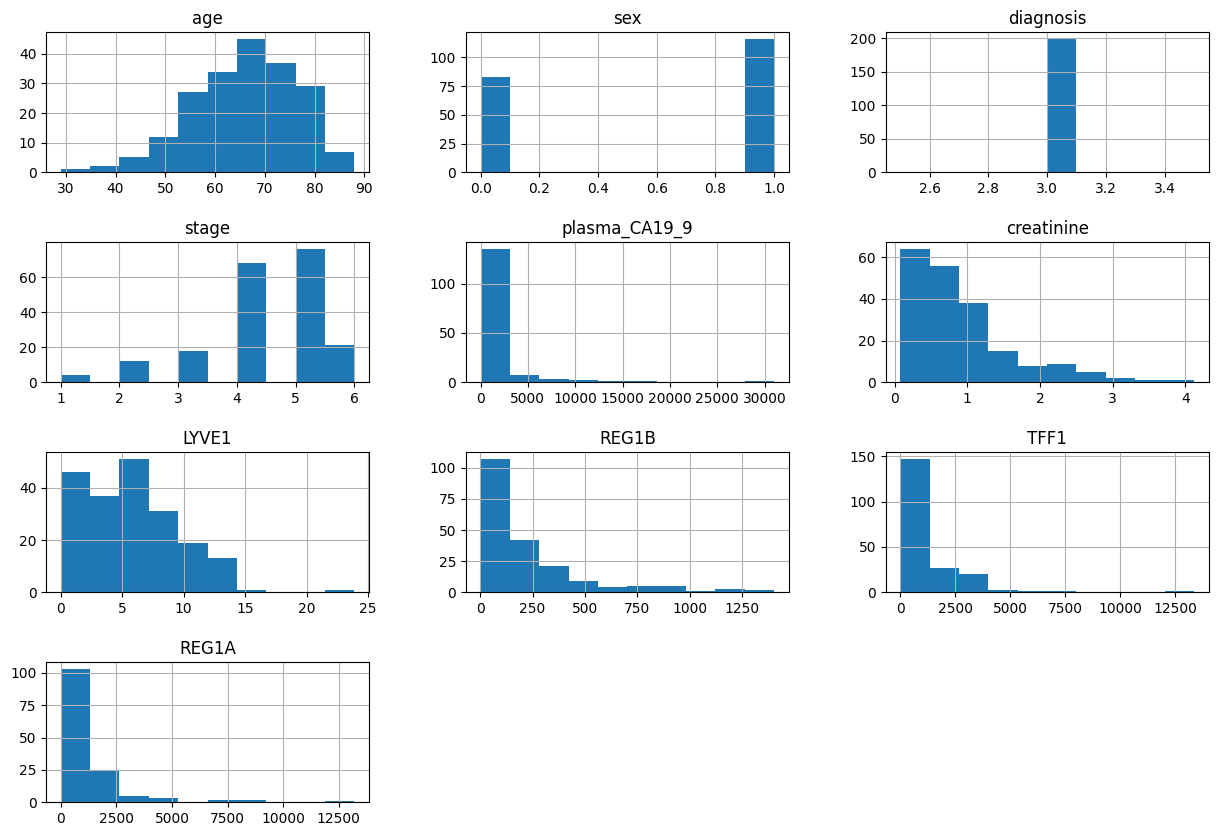

In [16]:
# Look into distributions of feature values in patients with pancreatic cancer specifically
ub_data[ub_data["diagnosis"]==3].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

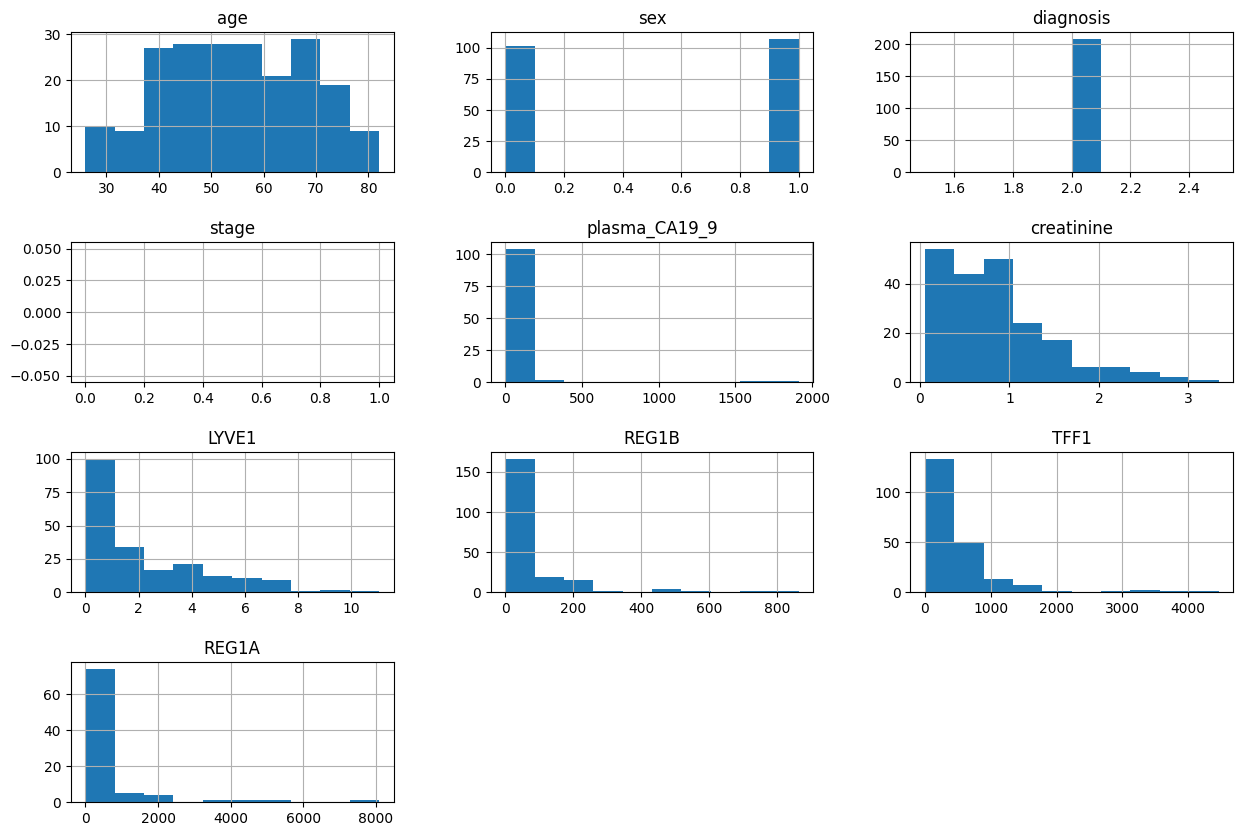

In [17]:
# Look into distributions of feature values in patients with non-cancerous pancreas condition specifically
ub_data[ub_data["diagnosis"]==2].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

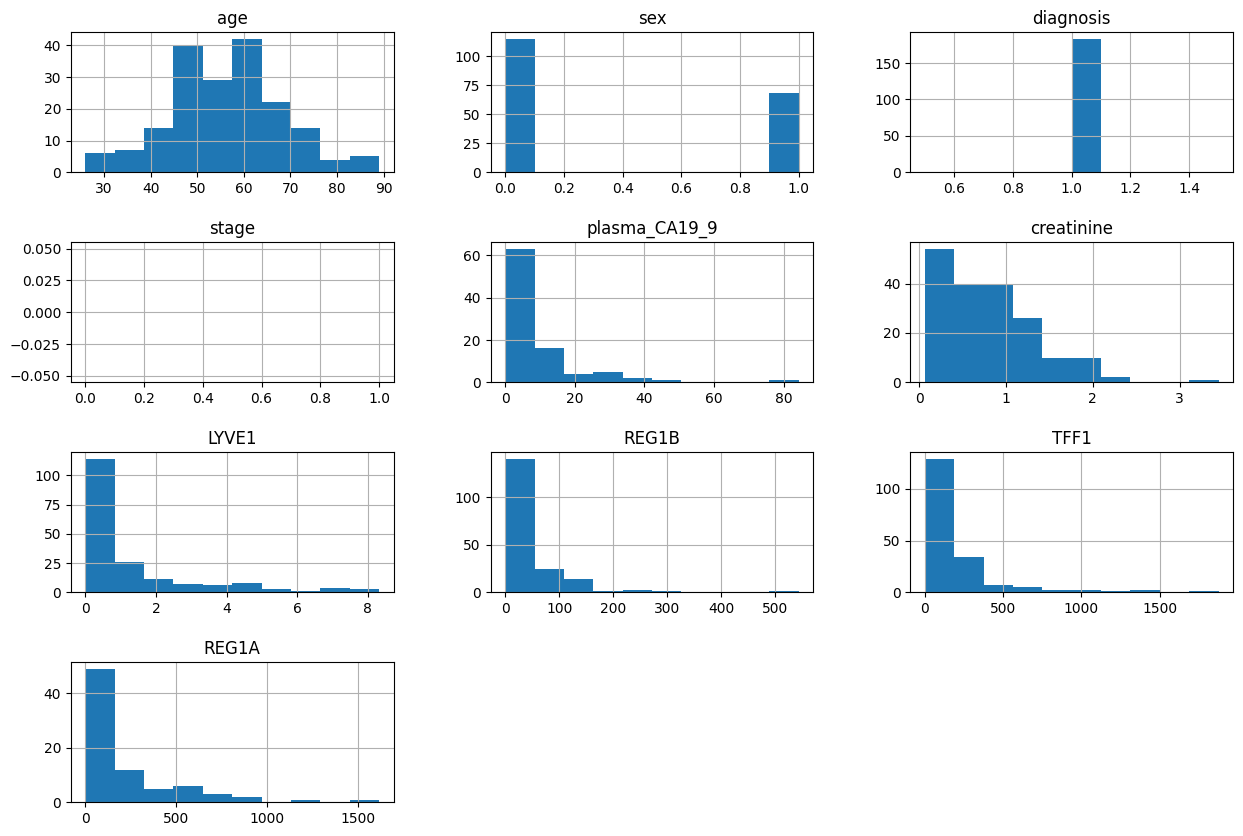

In [18]:
# Look into distributions of feature values in healthy patients
ub_data[ub_data["diagnosis"]==1].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

It looks like elder people are more vunerable to pancreatic cancer since the age distribution shifts towards right specifically in patients with pancreatic cancer (diagnosis 3).
Men are more susceptible to pancreatic cancer and non-cancerous pancreas condition than women as shown in the sex distribution.
There are several urinary biomarkers, including plasma CA19-19, LYVE1, REG1B, TFF1, and REG1A, that are highly elevated in patients with pancreatic cancer and non-cancerous pancreas condition compared with healthy controls.

In [19]:
# One of the purposes of this study is to access if REG1A can be replaced by REG1B in the panel and 
# further improve the performance of model to detect pancreatic cancer
# For this purpose, we will drop rows of ub_data with missing REG1A
ub_data_full_REG1A = ub_data.dropna(subset = ['REG1A'])

# Check if any rows contain missing REG1A values
print(ub_data_full_REG1A["REG1A"].isna().any())

# Check the number of rows before and after
print("Rows in original dataset: %d \n" % ub_data.shape[0])
print("Rows with na's dropped: %d" % ub_data_full_REG1A.shape[0])

False
Rows in original dataset: 590 

Rows with na's dropped: 306


In [20]:
# We will also generate another dataset without any missing values in all the six biomarkers
ub_data_full = ub_data.dropna(subset = ["plasma_CA19_9", "creatinine", "LYVE1", "REG1B", "TFF1", "REG1A"])

# Check if any rows contain missing values in all the six biomarkers
print(ub_data_full.loc[:, "plasma_CA19_9":"REG1A"].isna().any())

# Check the number of rows before and after
print("Rows in original dataset: %d \n" % ub_data.shape[0])
print("Rows with na's dropped: %d" % ub_data_full.shape[0])

plasma_CA19_9    False
creatinine       False
LYVE1            False
REG1B            False
TFF1             False
REG1A            False
dtype: bool
Rows in original dataset: 590 

Rows with na's dropped: 209


In [21]:
# Save the data to a new csv file
ub_data.to_csv('./archive/ub_data_cleaned.csv') 
ub_data_full_REG1A.to_csv('./archive/ub_data_full_REG1A.csv') 
ub_data_full.to_csv('./archive/ub_data_full.csv') 

In [22]:
# Alternatively, import Pandas Profiling
import ydata_profiling
report = ub_data.profile_report(sort=None, html={'style':{'full_width': True}}, progress_bar=False)
report